# Telecom Customer Churn- Logistic Regression 
By Ruibo Zhang

Problem Statement :<br/>

With 21 predictor variables we need to predict whether a particular customer will switch to another telecom provider or not.<br/>


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import seaborn as sns
pd.options.display.max_columns = None
pd.set_option('display.max_rows',None)
sns.set_style('dark')


import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
# Any results you write to the current directory are saved as output.

#building model
import statsmodels.api as sm
from sklearn.linear_model import LogisticRegression

#model evaluation
from sklearn.feature_selection import RFE
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn import metrics
from sklearn.metrics import precision_recall_curve

import seaborn as sns

In [2]:
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
import warnings
warnings.filterwarnings('ignore')

In [3]:
# import customer data
customer_df = pd.read_csv('/Users/ruibozhang/Downloads/archive-7/customer_data.csv')
# import churn_data
churn_df = pd.read_csv('/Users/ruibozhang/Downloads/archive-7/churn_data.csv')
# import internet data
internet_df = pd.read_csv('/Users/ruibozhang/Downloads/archive-7/internet_data.csv')

In [4]:
customer_df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents
0,7590-VHVEG,Female,0,Yes,No
1,5575-GNVDE,Male,0,No,No
2,3668-QPYBK,Male,0,No,No
3,7795-CFOCW,Male,0,No,No
4,9237-HQITU,Female,0,No,No


In [5]:
customer_df.shape

(7042, 5)

In [6]:
churn_df.head()

,customerID,tenure,PhoneService,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,1,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,34,Yes,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,2,Yes,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,45,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,2,Yes,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [7]:
churn_df.shape

(7042, 9)

In [8]:
internet_df.head()

,customerID,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
0,7590-VHVEG,No phone service,DSL,No,Yes,No,No,No,No
1,5575-GNVDE,No,DSL,Yes,No,Yes,No,No,No
2,3668-QPYBK,No,DSL,Yes,Yes,No,No,No,No
3,7795-CFOCW,No phone service,DSL,Yes,No,Yes,Yes,No,No
4,9237-HQITU,No,Fiber optic,No,No,No,No,No,No


In [9]:
internet_df.shape

(7042, 9)

In [10]:
df = pd.merge(customer_df, internet_df,how ='outer', on = 'customerID')

In [11]:
df = pd.merge(df,churn_df,how = 'outer', on = 'customerID')

In [12]:
df.shape

(7042, 21)

In [13]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,tenure,PhoneService,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,No phone service,DSL,No,Yes,No,No,No,No,1,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,No,DSL,Yes,No,Yes,No,No,No,34,Yes,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,No,DSL,Yes,Yes,No,No,No,No,2,Yes,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,45,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,No,Fiber optic,No,No,No,No,No,No,2,Yes,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [14]:
#checking if there is any null value
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
tenure              0
PhoneService        0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [15]:
#observe the unique values in each column
column_list = df.columns.values.tolist()
for i in range(20):
    print(column_list[i+1],":",df[column_list[i+1]].unique())

gender : ['Female' 'Male']
SeniorCitizen : [0 1]
Partner : ['Yes' 'No']
Dependents : ['No' 'Yes']
MultipleLines : ['No phone service' 'No' 'Yes']
InternetService : ['DSL' 'Fiber optic' 'No']
OnlineSecurity : ['No' 'Yes' 'No internet service']
OnlineBackup : ['Yes' 'No' 'No internet service']
DeviceProtection : ['No' 'Yes' 'No internet service']
TechSupport : ['No' 'Yes' 'No internet service']
StreamingTV : ['No' 'Yes' 'No internet service']
StreamingMovies : ['No' 'Yes' 'No internet service']
tenure : [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26  0
 39]
PhoneService : ['No' 'Yes']
Contract : ['Month-to-month' 'One year' 'Two year']
PaperlessBilling : ['Yes' 'No']
PaymentMethod : ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
MonthlyCharges : [29.85 56.95 53.85 ... 63.1  44.2

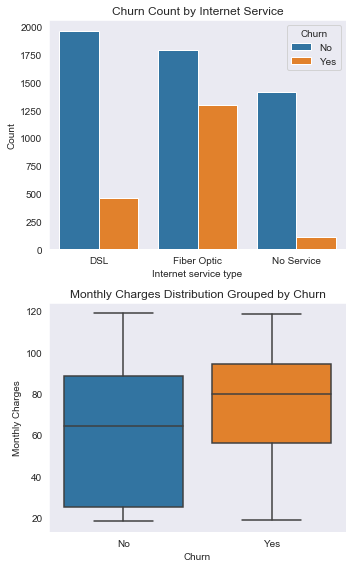

In [16]:
f = plt.figure(figsize=(5,8))
ax1 = f.add_subplot(211)

ax1 = sns.countplot(x='InternetService', hue='Churn',
                   data=df)
ax1.set_title('Churn Count by Internet Service')
ax1.set_ylabel('Count')
ax1.set_xlabel('Internet service type')
ax1.set_xticklabels(('DSL', 'Fiber Optic','No Service'));

ax2 = f.add_subplot(212)

ax2 = sns.boxplot(x='Churn', y='MonthlyCharges', data=df)

ax2.set_title('Monthly Charges Distribution Grouped by Churn')
ax2.set_ylabel('Monthly Charges')
ax2.set_xlabel('Churn');
f.tight_layout()
plt.savefig('/Users/ruibozhang/Downloads/telecom_churn.png')

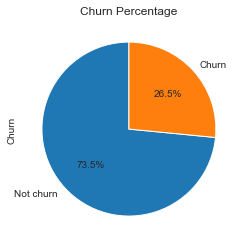

In [17]:
df['Churn'].value_counts().plot.pie(labels=['Not churn','Churn'],
                autopct='%1.1f%%', startangle=90)

plt.title('Churn Percentage')
plt.savefig('/Users/ruibozhang/Downloads/churn_percentage.png')

In [18]:
def convert_gender(string):
    if string == 'Male':
        output = 1
    else: 
        output = 0
    return output

In [19]:
df.gender = df.gender.apply(convert_gender)
df.head(20)

,customerID,gender,SeniorCitizen,Partner,Dependents,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,tenure,PhoneService,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,0,0,Yes,No,No phone service,DSL,No,Yes,No,No,No,No,1,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,1,0,No,No,No,DSL,Yes,No,Yes,No,No,No,34,Yes,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,1,0,No,No,No,DSL,Yes,Yes,No,No,No,No,2,Yes,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,1,0,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,45,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,0,0,No,No,No,Fiber optic,No,No,No,No,No,No,2,Yes,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
5,9305-CDSKC,0,0,No,No,Yes,Fiber optic,No,No,Yes,No,Yes,Yes,8,Yes,Month-to-month,Yes,Electronic check,99.65,820.5,Yes
6,1452-KIOVK,1,0,No,Yes,Yes,Fiber optic,No,Yes,No,No,Yes,No,22,Yes,Month-to-month,Yes,Credit card (automatic),89.10,1949.4,No
7,6713-OKOMC,0,0,No,No,No phone service,DSL,Yes,No,No,No,No,No,10,No,Month-to-month,No,Mailed check,29.75,301.9,No
8,7892-POOKP,0,0,Yes,No,Yes,Fiber optic,No,No,Yes,Yes,Yes,Yes,28,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes
9,6388-TABGU,1,0,No,Yes,No,DSL,Yes,Yes,No,No,No,No,62,Yes,One year,No,Bank transfer (automatic),56.15,3487.95,No


In [20]:
#convert yes/no
def convert_bool(string):
    if string == 'Yes':
        output = 1
    else:
        output = 0
    return output

In [21]:
df.Partner = df.Partner.apply(convert_bool)
df.Dependents = df.Dependents.apply(convert_bool)
df.PhoneService = df.PhoneService.apply(convert_bool)
df.PaperlessBilling = df.PaperlessBilling.apply(convert_bool)
df.Churn = df.Churn.apply(convert_bool)
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,tenure,PhoneService,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,0,0,1,0,No phone service,DSL,No,Yes,No,No,No,No,1,0,Month-to-month,1,Electronic check,29.85,29.85,0
1,5575-GNVDE,1,0,0,0,No,DSL,Yes,No,Yes,No,No,No,34,1,One year,0,Mailed check,56.95,1889.5,0
2,3668-QPYBK,1,0,0,0,No,DSL,Yes,Yes,No,No,No,No,2,1,Month-to-month,1,Mailed check,53.85,108.15,1
3,7795-CFOCW,1,0,0,0,No phone service,DSL,Yes,No,Yes,Yes,No,No,45,0,One year,0,Bank transfer (automatic),42.30,1840.75,0
4,9237-HQITU,0,0,0,0,No,Fiber optic,No,No,No,No,No,No,2,1,Month-to-month,1,Electronic check,70.70,151.65,1


# Create dummy variables and remove extra columns

In [22]:
# Creating dummy variables for the remaining categorical variables and dropping the 
#level with big names.
#pandas.get_dummies(data, prefix=None, prefix_sep='_', dummy_na=False, columns=None, sparse=False, drop_first=False, dtype=None)[source]
#Convert categorical variable into dummy/indicator variables.

dummy1 = pd.get_dummies(df[['Contract', 'PaymentMethod', 'InternetService']], drop_first=True)

# Adding the results to the master dataframe
df = pd.concat([df, dummy1], axis=1)
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,tenure,PhoneService,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,InternetService_Fiber optic,InternetService_No
0,7590-VHVEG,0,0,1,0,No phone service,DSL,No,Yes,No,No,No,No,1,0,Month-to-month,1,Electronic check,29.85,29.85,0,0,0,0,1,0,0,0
1,5575-GNVDE,1,0,0,0,No,DSL,Yes,No,Yes,No,No,No,34,1,One year,0,Mailed check,56.95,1889.5,0,1,0,0,0,1,0,0
2,3668-QPYBK,1,0,0,0,No,DSL,Yes,Yes,No,No,No,No,2,1,Month-to-month,1,Mailed check,53.85,108.15,1,0,0,0,0,1,0,0
3,7795-CFOCW,1,0,0,0,No phone service,DSL,Yes,No,Yes,Yes,No,No,45,0,One year,0,Bank transfer (automatic),42.30,1840.75,0,1,0,0,0,0,0,0
4,9237-HQITU,0,0,0,0,No,Fiber optic,No,No,No,No,No,No,2,1,Month-to-month,1,Electronic check,70.70,151.65,1,0,0,0,1,0,1,0


In [23]:
# Creating dummy variables for the remaining categorical variables and dropping the level with big names.

# Creating dummy variables for the variable 'MultipleLines'
ml = pd.get_dummies(df['MultipleLines'], prefix='MultipleLines')
# Dropping MultipleLines_No phone service column
ml1 = ml.drop(['MultipleLines_No phone service'], 1)
#Adding the results to the master dataframe
df = pd.concat([df,ml1], axis=1)

# Creating dummy variables for the variable 'OnlineSecurity'.
os = pd.get_dummies(df['OnlineSecurity'], prefix='OnlineSecurity')
os1 = os.drop(['OnlineSecurity_No internet service'], 1)
# Adding the results to the master dataframe
df = pd.concat([df,os1], axis=1)

# Creating dummy variables for the variable 'OnlineBackup'.
ob = pd.get_dummies(df['OnlineBackup'], prefix='OnlineBackup')
ob1 = ob.drop(['OnlineBackup_No internet service'], 1)
# Adding the results to the master dataframe
df = pd.concat([df,ob1], axis=1)

# Creating dummy variables for the variable 'DeviceProtection'. 
dp = pd.get_dummies(df['DeviceProtection'], prefix='DeviceProtection')
dp1 = dp.drop(['DeviceProtection_No internet service'], 1)
# Adding the results to the master dataframe
df = pd.concat([df,dp1], axis=1)

# Creating dummy variables for the variable 'TechSupport'. 
ts = pd.get_dummies(df['TechSupport'], prefix='TechSupport')
ts1 = ts.drop(['TechSupport_No internet service'], 1)
# Adding the results to the master dataframe
df = pd.concat([df,ts1], axis=1)

# Creating dummy variables for the variable 'StreamingTV'.
st =pd.get_dummies(df['StreamingTV'], prefix='StreamingTV')
st1 = st.drop(['StreamingTV_No internet service'], 1)
# Adding the results to the master dataframe
df = pd.concat([df,st1], axis=1)

# Creating dummy variables for the variable 'StreamingMovies'. 
sm = pd.get_dummies(df['StreamingMovies'], prefix='StreamingMovies')
sm1 = sm.drop(['StreamingMovies_No internet service'], 1)
# Adding the results to the master dataframe
df = pd.concat([df,sm1], axis=1)
df.head()


,customerID,gender,SeniorCitizen,Partner,Dependents,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,tenure,PhoneService,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,InternetService_Fiber optic,InternetService_No,MultipleLines_No,MultipleLines_Yes,OnlineSecurity_No,OnlineSecurity_Yes,OnlineBackup_No,OnlineBackup_Yes,DeviceProtection_No,DeviceProtection_Yes,TechSupport_No,TechSupport_Yes,StreamingTV_No,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_Yes
0,7590-VHVEG,0,0,1,0,No phone service,DSL,No,Yes,No,No,No,No,1,0,Month-to-month,1,Electronic check,29.85,29.85,0,0,0,0,1,0,0,0,0,0,1,0,0,1,1,0,1,0,1,0,1,0
1,5575-GNVDE,1,0,0,0,No,DSL,Yes,No,Yes,No,No,No,34,1,One year,0,Mailed check,56.95,1889.5,0,1,0,0,0,1,0,0,1,0,0,1,1,0,0,1,1,0,1,0,1,0
2,3668-QPYBK,1,0,0,0,No,DSL,Yes,Yes,No,No,No,No,2,1,Month-to-month,1,Mailed check,53.85,108.15,1,0,0,0,0,1,0,0,1,0,0,1,0,1,1,0,1,0,1,0,1,0
3,7795-CFOCW,1,0,0,0,No phone service,DSL,Yes,No,Yes,Yes,No,No,45,0,One year,0,Bank transfer (automatic),42.30,1840.75,0,1,0,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,1,0,1,0
4,9237-HQITU,0,0,0,0,No,Fiber optic,No,No,No,No,No,No,2,1,Month-to-month,1,Electronic check,70.70,151.65,1,0,0,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0


In [24]:
df = df.drop(['Contract','PaymentMethod','MultipleLines','InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies'], 1)
#df = df.drop(['customerID','OnlineSecurity_No','OnlineBackup_No','DeviceProtection_No','TechSupport_No','StreamingTV_No','StreamingMovies_No'],axis = 1)
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,InternetService_Fiber optic,InternetService_No,MultipleLines_No,MultipleLines_Yes,OnlineSecurity_No,OnlineSecurity_Yes,OnlineBackup_No,OnlineBackup_Yes,DeviceProtection_No,DeviceProtection_Yes,TechSupport_No,TechSupport_Yes,StreamingTV_No,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_Yes
0,7590-VHVEG,0,0,1,0,1,0,1,29.85,29.85,0,0,0,0,1,0,0,0,0,0,1,0,0,1,1,0,1,0,1,0,1,0
1,5575-GNVDE,1,0,0,0,34,1,0,56.95,1889.5,0,1,0,0,0,1,0,0,1,0,0,1,1,0,0,1,1,0,1,0,1,0
2,3668-QPYBK,1,0,0,0,2,1,1,53.85,108.15,1,0,0,0,0,1,0,0,1,0,0,1,0,1,1,0,1,0,1,0,1,0
3,7795-CFOCW,1,0,0,0,45,0,0,42.30,1840.75,0,1,0,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,1,0,1,0
4,9237-HQITU,0,0,0,0,2,1,1,70.70,151.65,1,0,0,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0


In [25]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'PaperlessBilling', 'MonthlyCharges',
       'TotalCharges', 'Churn', 'Contract_One year', 'Contract_Two year',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check',
       'InternetService_Fiber optic', 'InternetService_No', 'MultipleLines_No',
       'MultipleLines_Yes', 'OnlineSecurity_No', 'OnlineSecurity_Yes',
       'OnlineBackup_No', 'OnlineBackup_Yes', 'DeviceProtection_No',
       'DeviceProtection_Yes', 'TechSupport_No', 'TechSupport_Yes',
       'StreamingTV_No', 'StreamingTV_Yes', 'StreamingMovies_No',
       'StreamingMovies_Yes'],
      dtype='object')

In [26]:
df = df[['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'PaperlessBilling', 'MonthlyCharges',
       'TotalCharges', 'Contract_One year', 'Contract_Two year',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check',
       'InternetService_Fiber optic', 'InternetService_No', 'MultipleLines_No',
       'MultipleLines_Yes', 'OnlineSecurity_No', 'OnlineSecurity_Yes',
       'OnlineBackup_No', 'OnlineBackup_Yes', 'DeviceProtection_No',
       'DeviceProtection_Yes', 'TechSupport_No', 'TechSupport_Yes',
       'StreamingTV_No', 'StreamingTV_Yes', 'StreamingMovies_No',
       'StreamingMovies_Yes', 'Churn']]

In [27]:
df['TotalCharges'].describe()
df['TotalCharges'] = df['TotalCharges'].replace(' ', np.nan)
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'])

In [28]:
df.isnull().sum()

customerID                                0
gender                                    0
SeniorCitizen                             0
Partner                                   0
Dependents                                0
tenure                                    0
PhoneService                              0
PaperlessBilling                          0
MonthlyCharges                            0
TotalCharges                             11
Contract_One year                         0
Contract_Two year                         0
PaymentMethod_Credit card (automatic)     0
PaymentMethod_Electronic check            0
PaymentMethod_Mailed check                0
InternetService_Fiber optic               0
InternetService_No                        0
MultipleLines_No                          0
MultipleLines_Yes                         0
OnlineSecurity_No                         0
OnlineSecurity_Yes                        0
OnlineBackup_No                           0
OnlineBackup_Yes                

In [29]:
new_value = (df['TotalCharges']/df['MonthlyCharges']).mean()*df['MonthlyCharges']
df['TotalCharges'].replace(np.nan, new_value, inplace=True)

In [30]:
df.isnull().sum()

customerID                               0
gender                                   0
SeniorCitizen                            0
Partner                                  0
Dependents                               0
tenure                                   0
PhoneService                             0
PaperlessBilling                         0
MonthlyCharges                           0
TotalCharges                             0
Contract_One year                        0
Contract_Two year                        0
PaymentMethod_Credit card (automatic)    0
PaymentMethod_Electronic check           0
PaymentMethod_Mailed check               0
InternetService_Fiber optic              0
InternetService_No                       0
MultipleLines_No                         0
MultipleLines_Yes                        0
OnlineSecurity_No                        0
OnlineSecurity_Yes                       0
OnlineBackup_No                          0
OnlineBackup_Yes                         0
DeviceProte

(7042, 32)


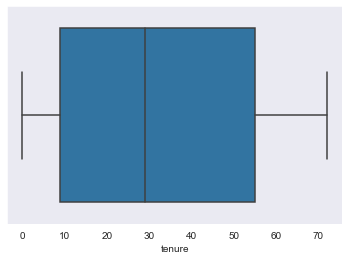

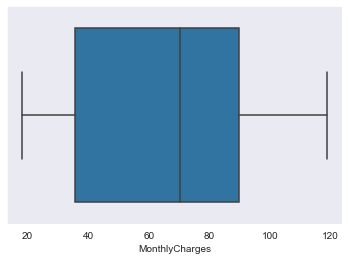

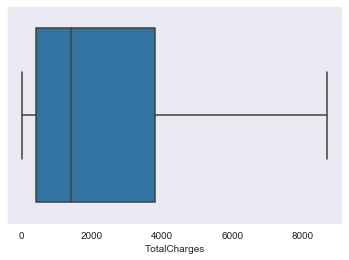

In [31]:
#Visualize to see if there is any outlier for the three continuous variables.
print(df.shape)
for col in ['tenure','MonthlyCharges','TotalCharges']:
    sns.boxplot(df[col])
    plt.show()

In [32]:
#Standardize three continuous variables 
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df[['tenure','MonthlyCharges','TotalCharges']] = scaler.fit_transform(df[['tenure','MonthlyCharges','TotalCharges']])
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,InternetService_Fiber optic,InternetService_No,MultipleLines_No,MultipleLines_Yes,OnlineSecurity_No,OnlineSecurity_Yes,OnlineBackup_No,OnlineBackup_Yes,DeviceProtection_No,DeviceProtection_Yes,TechSupport_No,TechSupport_Yes,StreamingTV_No,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_Yes,Churn
0,7590-VHVEG,0,0,1,0,-1.277330,0,1,-1.160200,-0.994037,0,0,0,1,0,0,0,0,0,1,0,0,1,1,0,1,0,1,0,1,0,0
1,5575-GNVDE,1,0,0,0,0.066526,1,0,-0.259452,-0.172941,1,0,0,0,1,0,0,1,0,0,1,1,0,0,1,1,0,1,0,1,0,0
2,3668-QPYBK,1,0,0,0,-1.236607,1,1,-0.362489,-0.959465,0,0,0,0,1,0,0,1,0,0,1,0,1,1,0,1,0,1,0,1,0,1
3,7795-CFOCW,1,0,0,0,0.514478,0,0,-0.746387,-0.194466,1,0,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,1,0,1,0,0
4,9237-HQITU,0,0,0,0,-1.236607,1,1,0.197570,-0.940258,0,0,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1


Text(0.5, 1.0, 'Correlations between Churn and variables')

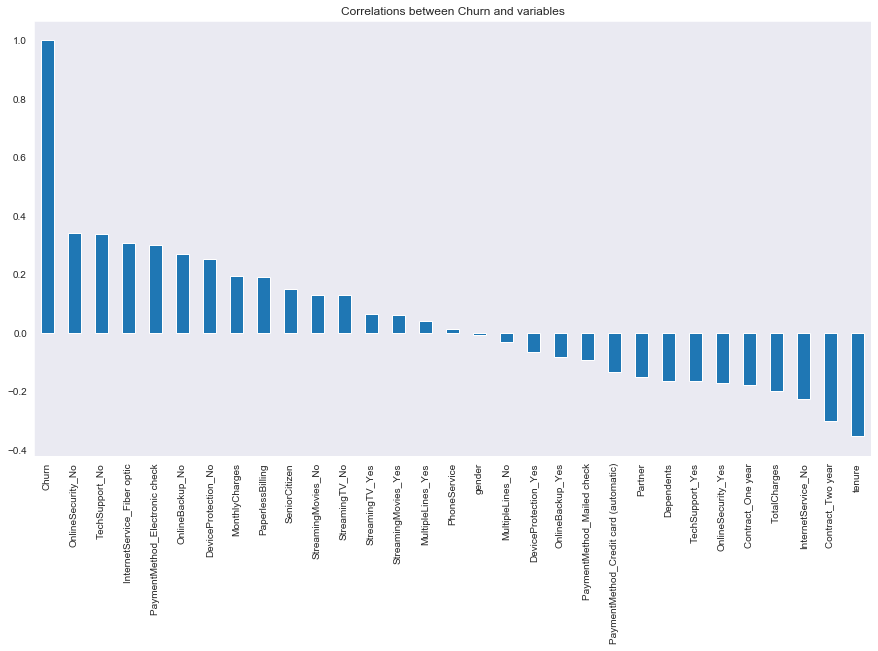

In [33]:
df.head()
plt.figure(figsize=(15,8))
df.corr()['Churn'].sort_values(ascending = False).plot(kind='bar')
plt.title("Correlations between Churn and variables")

### Recursive Feature Elimination (RFE) for feature selection
Feature selection refers to techniques that select a subset of the most relevant features (columns) for a dataset. Recursive Feature Elimination (RFE) is based on the idea to repeatedly construct a model and choose either the best or worst performing feature, setting the feature aside and then repeating the process with the rest of the features. This process is applied until all features in the dataset are exhausted.<br/>
Fewer features can allow machine learning algorithms to run more efficiently (less space or time complexity) and be more effective. Some machine learning algorithms can be misled by irrelevant input features, resulting in worse predictive performance.

In [34]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression 

In [35]:
logreg = LogisticRegression()
#select 15 most important features out of all features
rfe = RFE(logreg, 15)
rfe = rfe.fit(df.drop(['Churn','customerID'], axis=1), df['Churn'])
print(rfe.support_)
print(rfe.ranking_)
#The feature ranking, such that ranking_[i] corresponds to the ranking position of the i-th feature. 
#Selected (i.e., estimated best) features are assigned rank 1.

[False  True False False  True False  True  True  True  True  True False
  True False  True  True  True False  True False False False False False
  True False False  True False  True]
[15  1 16  2  1  3  1  1  1  1  1  9  1 10  1  1  1 14  1  5  4 13  7  8
  1  6 12  1 11  1]


In [36]:
# Reveal the features that can be helpful
trueind = np.where(rfe.support_)[0]
df_col_lst = df.columns.values.tolist()
dataset = []
for num in trueind:
    dataset.append(df_col_lst[num+1])
print(dataset)

['SeniorCitizen', 'tenure', 'PaperlessBilling', 'MonthlyCharges', 'TotalCharges', 'Contract_One year', 'Contract_Two year', 'PaymentMethod_Electronic check', 'InternetService_Fiber optic', 'InternetService_No', 'MultipleLines_No', 'OnlineSecurity_No', 'TechSupport_No', 'StreamingTV_Yes', 'StreamingMovies_Yes']


In [37]:
X = df[dataset]
print (X.shape)

(7042, 15)


In [38]:
Y = df['Churn']
print(Y.shape)

(7042,)


In [39]:
X_train = X[0:int(len(X)*0.7)]
X_test = X[int(len(X)*0.7):]
Y_train = Y[0:int(len(Y)*0.7)]
Y_test = Y[int(len(Y)*0.7):]

In [40]:
print(X_train.shape)
print(Y_train.shape)
print(X_test.shape)
print(Y_test.shape)

(4929, 15)
(4929,)
(2113, 15)
(2113,)


### Model Implementation 

In [41]:
import statsmodels.api as sm
logit_model=sm.Logit(Y_train,X_train)
result = logit_model.fit()
print (result.summary2())

Optimization terminated successfully.
         Current function value: 0.434533
         Iterations 8
                                Results: Logit
Model:                   Logit                Pseudo R-squared:     0.244      
Dependent Variable:      Churn                AIC:                  4313.6280  
Date:                    2021-02-25 23:49     BIC:                  4411.1714  
No. Observations:        4929                 Log-Likelihood:       -2141.8    
Df Model:                14                   LL-Null:              -2832.4    
Df Residuals:            4914                 LLR p-value:          1.8901e-286
Converged:               1.0000               Scale:                1.0000     
No. Iterations:          8.0000                                                
-------------------------------------------------------------------------------
                                Coef.  Std.Err.    z     P>|z|   [0.025  0.975]
---------------------------------------------------

In [42]:
X_train = X_train[['tenure','MonthlyCharges','Contract_One year', 'Contract_Two year',  'InternetService_No' , 'MultipleLines_No']]
X_test = X_test[['tenure','MonthlyCharges','Contract_One year', 'Contract_Two year',  'InternetService_No' , 'MultipleLines_No']]
X_test[['tenure','MonthlyCharges']] = scaler.fit_transform(X_test[['tenure','MonthlyCharges']])

In [43]:
logit_model=sm.Logit(Y_train,X_train)
result = logit_model.fit()
print (result.summary2())

Optimization terminated successfully.
         Current function value: 0.437944
         Iterations 8
                          Results: Logit
Model:               Logit            Pseudo R-squared: 0.238      
Dependent Variable:  Churn            AIC:              4329.2524  
Date:                2021-02-25 23:49 BIC:              4368.2698  
No. Observations:    4929             Log-Likelihood:   -2158.6    
Df Model:            5                LL-Null:          -2832.4    
Df Residuals:        4923             LLR p-value:      3.2837e-289
Converged:           1.0000           Scale:            1.0000     
No. Iterations:      8.0000                                        
-------------------------------------------------------------------
                    Coef.  Std.Err.    z     P>|z|   [0.025  0.975]
-------------------------------------------------------------------
tenure             -0.6752   0.0553 -12.1992 0.0000 -0.7837 -0.5667
MonthlyCharges      0.4459   0.0533   8.3

In [44]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
logreg = LogisticRegression()
logreg.fit(X_train, Y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [45]:
Y_pred = logreg.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.3f}'.format(logreg.score(X_test, Y_test)))

Accuracy of logistic regression classifier on test set: 0.788


## Conclusion
#### Confusion Matrix 

In [46]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(Y_test, Y_pred)
print(confusion_matrix)

[[1385  148]
 [ 301  279]]


#### From the confusion matrix, we can see that  (1385+279 = 1664) of the predictions we made are correct <br/>
True positive: we predict 279 customers are going to churn and they did<br/>
True negative: we predict 1385 customers are not going to churn and they did not <br/>
False positive (type 1 error): we predict 148 customers are going to churn and they did not<br/>
False Negative (type 2 error): we predict 301 customers are not going to churn but they did
#### Action to Take 
1. Make general Improvements to the service provided based on customer survey.
2. Acquire new customers to cover customer loss
3. Offer customized discount or other types of incentives to customers who we predicts are going to churn.